## Aprendizagem Automática

# Lab4 - Modelos Lineares

### Regressão

#### Exemplo de pontos em torno de uma reta (RegressData001.p)

In [513]:
import pickle
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [514]:
D = pickle.load(open('RegressData001.p', 'rb'))
x = D['x']
y = D['y']

In [515]:
print(x.shape, y.shape)

(1, 500) (1, 500)


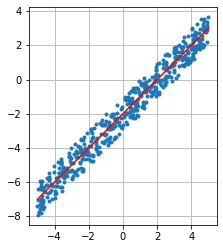

In [516]:
plt.plot(x[0, :], y[0, :], '.')
plt.axis('scaled')
plt.grid()
plt.plot(np.array([-5, 5]), np.array([-5, 5])-2, 'r')

In [517]:
X = np.vstack((np.ones(500), x))
Rx = np.dot(X, X.T)
rxy = np.dot(X, y.T)
w = np.dot(la.pinv(Rx), rxy)
print(w)

[[-2.01391133]
 [ 0.99728753]]


(-5.0, 5.0, -2.0, 2.0)

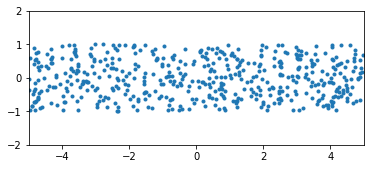

In [518]:
ye = np.dot(w.T, X)
e = y-ye
plt.plot(x[0,:], e[0, :], '.')
plt.axis('scaled')
plt.axis([-5,5,-2,2])

In [519]:
ye.shape

(1, 500)

In [520]:
Vtot = np.mean((y-np.mean(y))**2)
Pe = np.mean(e**2)
R2 = 1-(Pe/Vtot)
print(R2)

0.965452847371007


#### Exemplo de pontos em torno de uma reta (RegressData002.p)

In [521]:
D = pickle.load(open('RegressData002.p', 'rb'))
x = D['x']
y = D['y']

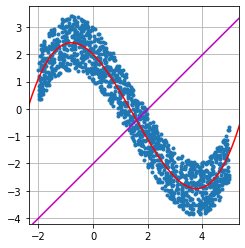

In [522]:
plt.plot(x[0, :], y[0, :], '.')
plt.axis('scaled')
plt.grid()
t = np.linspace(-3,6,500)
plt.plot(t, 1/9*t**3-1/2*t**2-t+2, 'r')
plt.plot(np.array([-3,6]), np.array([-3,6])*w[1]+w[0], 'm')

In [523]:
X = np.vstack((np.ones(x.shape[1]), x))
Rx = np.dot(X, X.T)
rxy = np.dot(X, y.T)
w = np.dot(la.pinv(Rx), rxy)
w

array([[ 1.11538364],
       [-0.91987301]])

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

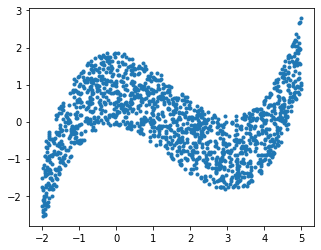

In [524]:
ye = np.dot(w.T, X)
e = y-ye
plt.plot(x[0, :], e[0, :], '.')
plt.axis('scaled')
plt.grid

In [525]:
m = np.mean(y)
Vtot = np.mean((y-m)**2)
Pe = np.mean(e**2)
R2 = 1-(Pe/Vtot)
R2

0.8001643397731499

In [526]:
X = np.vstack((np.ones(x.shape[1]), x, x**2, x**3))
Rx = np.dot(X, X.T)
rxy = np.dot(X, y.T)
w = np.dot(la.pinv(Rx), rxy)
w

array([[ 2.01160905],
       [-0.98245165],
       [-0.51315283],
       [ 0.11294984]])

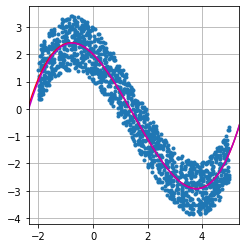

In [527]:
plt.plot(x[0, :], y[0, :], '.')
plt.axis('scaled')
plt.grid()
t = np.linspace(-3,6,500)
plt.plot(t, 1/9*t**3-1/2*t**2-t+2, 'r')
plt.plot(t, w[3]*t**3 + w[2]*t**2 + w[1]*t + w[0] , 'm')

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

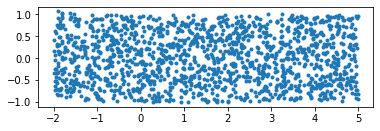

In [528]:
ye = np.dot(w.T, X)
e = y-ye
m = np.mean(y)
Vtot = np.mean((y-m)**2)
Pe = np.mean(e**2)
R2 = 1-(Pe/Vtot)
R2
plt.plot(x[0, :], e[0, :], '.')
plt.axis('scaled')
plt.grid

## Exemplo: Boston Dataset

In [529]:
import sklearn.datasets as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
d = dt.load_boston()

c:\Users\tomas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [530]:
print(d.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [531]:
d.keys()
X = d.data
y = d.target
X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3, shuffle=True, random_state=42)


In [532]:
print(X.shape)
print(X1.shape)
print(X2.shape)

(506, 13)
(337, 13)
(169, 13)


In [533]:
#Regressão Linear
rl = LinearRegression().fit(X1, y1)
print(rl.score(X1, y1))
print(rl.score(X2, y2))


0.7389831456966496
0.7262099239984421


In [534]:
print(rl.intercept_)
w = rl.coef_
print(w)

33.440834273883425
[-1.29469552e-01  3.79597901e-02  6.09783935e-02  3.21349778e+00
 -1.64996136e+01  3.91151860e+00 -1.26019052e-02 -1.42774164e+00
  2.39545629e-01 -8.17982439e-03 -9.35991036e-01  1.19478911e-02
 -5.46562433e-01]


In [535]:
Xa = np.vstack((np.ones(X1.shape[0]), X1.T))
Rx = np.dot(Xa, Xa.T)
rxy = np.dot(Xa, y1.T)
w2 = np.dot(la.pinv(Rx), rxy)
print(w2)

[ 3.34408343e+01 -1.29469552e-01  3.79597901e-02  6.09783935e-02
  3.21349778e+00 -1.64996136e+01  3.91151860e+00 -1.26019052e-02
 -1.42774164e+00  2.39545629e-01 -8.17982439e-03 -9.35991036e-01
  1.19478911e-02 -5.46562433e-01]


## Boston Dataset: Regressão polinomial

In [536]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)

In [537]:
print(X1a.shape)
print(X2a.shape)


(337, 559)
(169, 559)


In [538]:
rl = LinearRegression().fit(X1a, y1)
print(rl.score(X1a, y1))
print(rl.score(X2a, y2))

1.0
-133.3669752883762


In [539]:
y1e = rl.predict(X1a)
y2e = rl.predict(X2a)

In [540]:
print(y1[:10])
y1e[:10]

[27.1 20.1 19.8 21.  41.3 23.2 20.4 18.5 29.4 36.4]


array([27.1, 20.1, 19.8, 21. , 41.3, 23.2, 20.4, 18.5, 29.4, 36.4])

In [541]:
y2e[:10]

array([ 20.90823935,  60.62796266,  -9.20961183,  32.46395528,
        20.8776215 , -26.36721919,  17.19974484,   8.30127613,
        -7.19474958,  14.89407173])

In [542]:
w = rl.coef_

#modelo em sobreaprendizagem
print(w.max())

1.5942627143923571


### Boston Dataset: Regularização

In [543]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

X = d.data
y = d.target
X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3, shuffle=True, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)

rl = Lasso(alpha=1).fit(X1a, y1)
print('R2 (treino): ', rl.score(X1a, y1))
print('R2 (teste): ', rl.score(X2a, y2))

R2 (treino):  0.8914413224692754
R2 (teste):  0.8329182239945707


c:\Users\tomas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.935e+03, tolerance: 2.977e+00
  model = cd_fast.enet_coordinate_descent(


In [544]:
print(X1a.shape)

(337, 104)


57


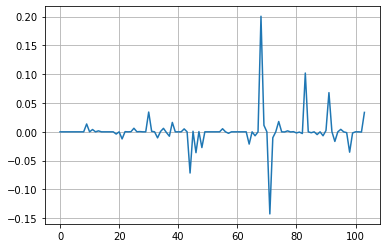

In [545]:
w = rl.coef_
plt.plot(w)
plt.grid()
print(np.sum(np.abs(w)>1e-10))

In [546]:
w

array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.36375025e-02, -0.00000000e+00,  4.01621722e-03,
       -0.00000000e+00,  1.69413361e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.86013290e-03,
       -0.00000000e+00, -1.23190111e-02,  2.81799010e-04,  0.00000000e+00,
        2.13630366e-04,  6.20493058e-03,  1.52802584e-04,  4.19553867e-04,
        0.00000000e+00,  0.00000000e+00,  3.43392656e-02,  9.33398691e-04,
        0.00000000e+00, -1.04699699e-02,  5.53235686e-04,  6.05728448e-03,
       -1.16938051e-03, -7.61054987e-03,  1.63370078e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  5.10103118e-03, -0.00000000e+00,
       -7.14999946e-02,  9.95808103e-04, -3.62236732e-02,  4.52826462e-04,
       -2.73203526e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

## Regressão: Sinais audio (Instrumentos musicais)

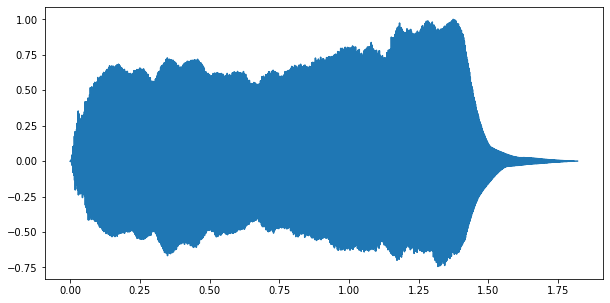

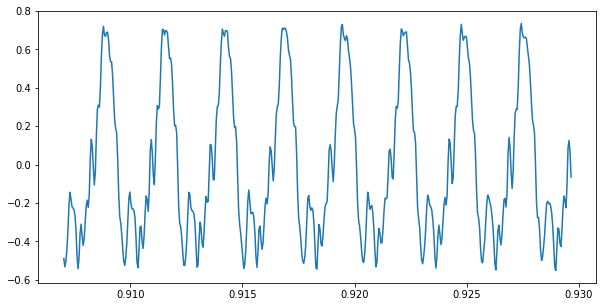

In [547]:
import scipy.signal as sg
import scipy.io.wavfile as wav
from soundPlay import soundPlay

wavFile = 'Violin.arco.ff.sulG.Gb4.mono.wav'
fs, x = wav.read(wavFile)
x = x*1./2**15

plt.figure(figsize=(10,5))
plt.plot(np.arange(x.shape[0])/fs, x)
plt.figure(figsize=(10,5))
plt.plot(np.arange(20000,20500)/fs, x[20000:20500])

In [548]:
#soundPlay(x, fs)

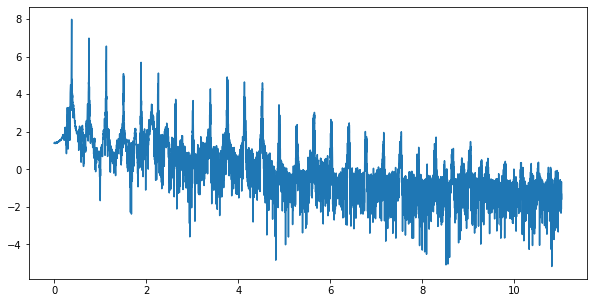

In [549]:
xf = np.abs(np.fft.fft(x, 20000))
plt.figure(figsize=(10,5))
f = np.linspace(0, fs/2, 10000)/1000
plt.plot(f,np.log(xf[:10000]))

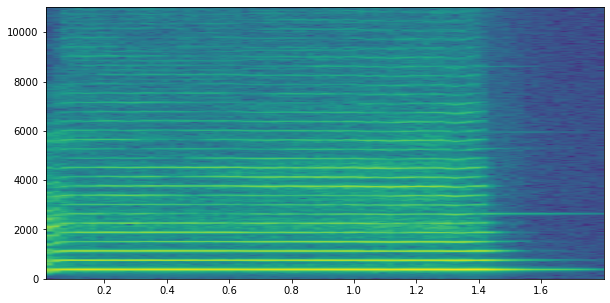

In [550]:
plt.figure(figsize=(10,5))
tmp = plt.specgram(x, NFFT=1024, noverlap=512, Fs=fs)

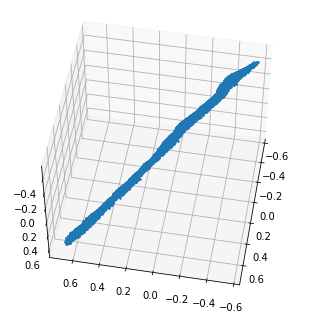

In [551]:
from mpl_toolkits.mplot3d import Axes3D
f1 = plt.figure(figsize=(6,5.5))
ax = f1.add_subplot(111, projection='3d')
xt = x[1000:6001]
ax.plot(xt[0:-2], xt[1:-1], xt[2:], '.-', ms=3)
ax.elev=-130
ax.azim=170

([<matplotlib.axis.YTick at 0x1c44b3b7dc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

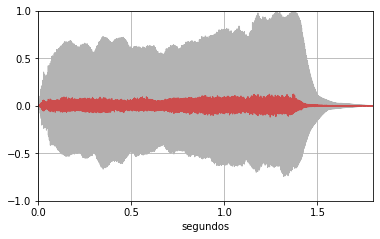

In [552]:
pF=25 #ordem do filtro
X=x[0:-pF]
for i in np.arange(pF-1,0,-1):
    X=np.vstack((x[pF-i:-i],X))
    
#"Matriz" (1xN) dos ys
Y=x[pF:]#para ficar um array de (1x n� amostras)
Y=Y[np.newaxis,:]
#N=X.shape[1] #n� amostras
############################################################
#Estimar vector dos w=[w1,w2,...,w10].T
Rx=np.dot(X,X.T);rxy=np.dot(X,Y.T)
w=np.dot(np.linalg.pinv(Rx),rxy)
############################################################
#Ver o erro de estima��o
#1. calcular y^
Y2=np.dot(w.T,X)
#2. Erro instantaneo Er[n]
Er=Y-Y2
#3. Erro total SUM(Er[n]^2)
ErTot=sum(Er**2)
#fazer plot
plt.figure(figsize=(6,3.5))
t=np.linspace(0,1.0*Er.shape[1]/fs,Er.shape[1])
plt.plot(t,Y[0,:],'-',lw=1,color=[.7,.7,.7])
plt.plot(t,Er[0,:],'-',lw=1,color=[.8,.3,.3])
plt.axis([0,1.8,-1,1])
plt.grid(True)
plt.xlabel('segundos')
plt.xticks(np.arange(0,1.8,.5));plt.yticks(np.arange(-1,1.1,.5))

In [553]:
w2 = np.hstack((1, -w.squeeze()))
trDirac = np.zeros(x.shape[0])
trDirac[np.arange(0, x.shape[0], 59)] = 1.0
xSint = sg.lfilter(np.array([1.0]), w2, trDirac)

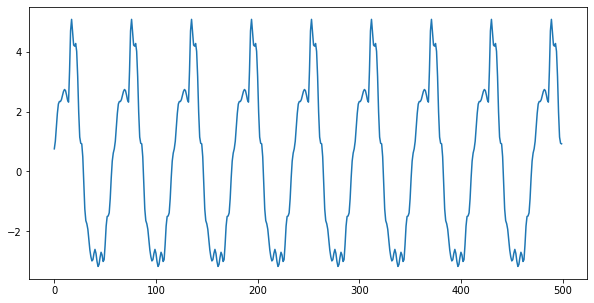

In [554]:
plt.figure(figsize=(10,5))
plt.plot(xSint[5000:5500])

# Classificação: Discriminantes lineares e quadráticos

## Duas classes: dígitos "0" e "1"

In [555]:
D = pickle.load(open('MNISTsmall.p', 'rb'))
X = D['X']*1.
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']
X1 = X[:, f1]
X2 = X[:, f2]
y1 = y[f1]
y2 = y[f2]
Xa = X1[:, y1==0]
Xb = X1[:, y1==1]
X1 = np.vstack((np.ones(2000), np.hstack((Xa,Xb))))
y1 = np.hstack((-np.ones(1000), np.ones(1000)))
Xa = X2[:, y2==0]
Xb = X2[:, y2==1]
X2 = np.vstack((np.ones(1000), np.hstack((Xa, Xb))))
y2 = np.hstack((-np.ones(500), np.ones(500)))

In [556]:
Rx = np.dot(X1, X1.T)
rxy = np.dot(X1, y1.T)
w = np.dot(la.pinv(Rx), rxy)
y1e = np.dot(w.T, X1)
y2e = np.dot(w.T, X2)

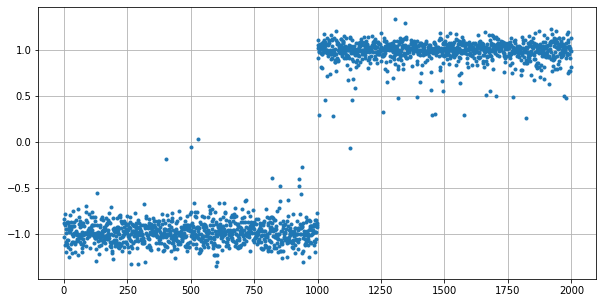

In [557]:
plt.figure(figsize=(10,5))
plt.plot(y1e, '.')
plt.grid()

In [558]:
y1eb = (y1e>0)*2-1
np.argwhere(y1!=y1eb)


array([[ 527],
       [1127]], dtype=int64)

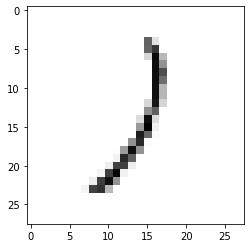

In [559]:
z = X1[1:, 1127].reshape(28,28)
plt.imshow(z, cmap='binary')

(0.0, 1000.0, -2.0, 2.0)

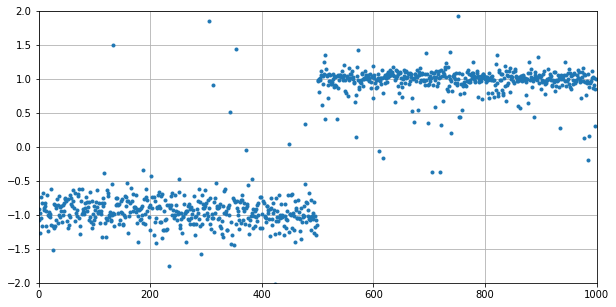

In [560]:
plt.figure(figsize=(10,5))
plt.plot(y2e, '.')
plt.grid()
plt.axis([0,1000,-2,2,])

In [561]:
y2eb = (y2e>0)*2-1
idx = np.argwhere(y2!=y2eb).squeeze()
idx

array([ 24,  63,  89, 134, 196, 205, 232, 306, 312, 343, 346, 348, 353,
       402, 449, 478, 610, 617, 705, 719, 848, 941, 985], dtype=int64)

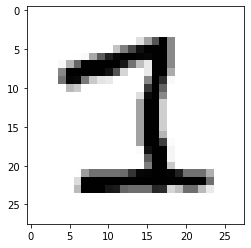

In [562]:
z = X2[1:, 63].reshape(28,28)
plt.imshow(z, cmap='binary')
z = X2[1:, 941].reshape(28,28)
plt.imshow(z, cmap='binary')

# Dígitos MNIST: classificação multi-classe

In [563]:
from sklearn.metrics import confusion_matrix
from plotMatriz import plotMatriz
import sklearn.preprocessing as pp

In [564]:
D = pickle.load(open('MNISTsmall.p', 'rb'))
X = D['X']*1.
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']
X1 = np.vstack((np.ones(10000), X[:, f1]))
X2 = np.vstack((np.ones(5000), X[:, f2]))
y1 = y[f1]
y2 = y[f2]

In [565]:
Y1 = -np.ones((10,10000))
for i in range(10):
    Y1[i, y1==i] = 1

Rx = np.dot(X1, X1.T)
rxy = np.dot(X1, Y1.T)
W = np.dot(la.pinv(Rx), rxy)


Numero d erros: 11.73 %


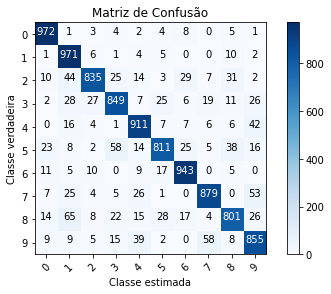

In [566]:
Y1e = np.dot(W.T, X1)
y1e = np.argmax(Y1e, axis=0)
MC = confusion_matrix(y1, y1e)
plotMatriz(MC)
print('Numero d erros:', (sum(y1!=y1e)/y1.shape[0]*100), '%')

Numero d erros: 19.98 %


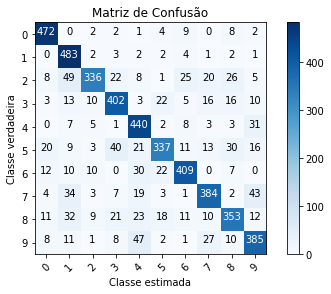

In [567]:
Y2e = np.dot(W.T, X2)
y2e = np.argmax(Y2e, axis=0)
MC = confusion_matrix(y2, y2e)
plotMatriz(MC)
print('Numero d erros:', (sum(y2!=y2e)/y2.shape[0]*100), '%')

## Discriminantes quadráticos - exemplo com dados sintéticos (QuadDiscData.p)

In [568]:
D = pickle.load(open('QuadDiscData.p', 'rb'))
D.keys()

dict_keys(['data', 'target'])

In [569]:
x = D['data']
y = D['target']

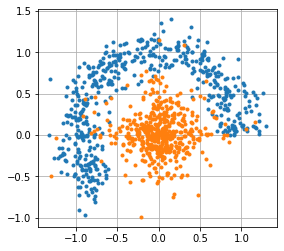

In [570]:
plt.plot(x[0, y==0], x[1, y==0], '.')
plt.plot(x[0, y==1], x[1, y==1], '.')
plt.axis('scaled')
plt.grid()

In [571]:
X = np.vstack((np.ones(1000), x))
Y = y*2-1
Rx = np.dot(X, X.T)
rxy = np.dot(X, Y.T)
w = np.dot(la.pinv(Rx), rxy)
yb = np.dot(w.T, X)
ye = (yb>=0)

266


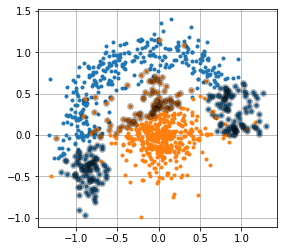

In [572]:
print(np.sum(y!=ye))
plt.plot(x[0, y==0], x[1, y==0], '.')
plt.plot(x[0, y==1], x[1, y==1], '.')
plt.plot(x[0, y!=ye], x[1, y!=ye], 'ok', alpha=.2)
plt.axis('scaled')
plt.grid()

In [573]:
poly=pp.PolynomialFeatures(degree=2).fit(x.T)
X = poly.transform(x.T).T
Y = y*2-1
Rx = np.dot(X, X.T)
rxy = np.dot(X, Y.T)
w = np.dot(la.pinv(Rx), rxy)
yb = np.dot(w.T, X)
ye = (yb>=0)

45


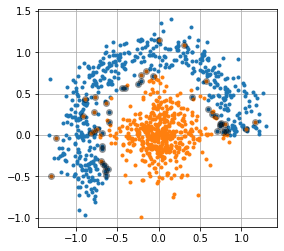

In [574]:
print(np.sum(y!=ye))
plt.plot(x[0, y==0], x[1, y==0], '.')
plt.plot(x[0, y==1], x[1, y==1], '.')
plt.plot(x[0, y!=ye], x[1, y!=ye], 'ok', alpha=.3)
plt.axis('scaled')
plt.grid()

## Discriminantes quadráticos - Iris dataset

In [575]:
import sklearn.datasets as DT
D = DT.load_iris()
x = D.data
y = D.target

In [576]:
X = np.vstack((np.ones(150), x.T))
Y = -np.ones((3,150))
for i in range(3):
    Y[i, y==i] = 1

Rx = np.dot(X, X.T)
rxy = np.dot(X, Y.T)
w = np.dot(la.pinv(Rx), rxy)
yb = np.dot(w.T, X)
ye = np.argmax(yb, axis=0)
print(np.sum(y!=ye))


23


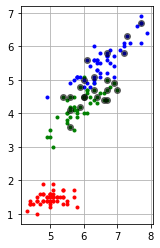

In [581]:
plt.plot(x[y==0, 0], x[y==0, 2], '.r')
plt.plot(x[y==1, 0], x[y==1, 2], '.g')
plt.plot(x[y==2, 0], x[y==2, 2], '.b')
plt.plot(x[y!=ye, 0], x[y!=ye, 2], 'ok', alpha=.5)
plt.axis('scaled')
plt.grid()

In [583]:
poly = pp.PolynomialFeatures(degree=2).fit(x)
X = poly.transform(x).T
Y = -np.ones((3,150))
for i in range(3):
    Y[i, y==i] = 1

Rx = np.dot(X, X.T)
rxy = np.dot(X, Y.T)
w = np.dot(la.pinv(Rx), rxy)
yb = np.dot(w.T, X)
ye = np.argmax(yb, axis=0)

print(np.sum(y!=ye))

3


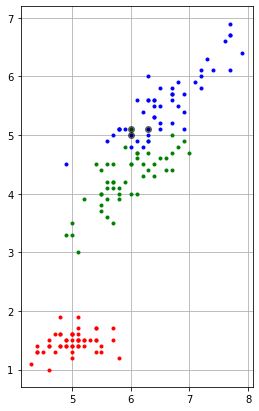

In [592]:
plt.figure(figsize=(6,7))
plt.plot(x[y==0, 0], x[y==0, 2], '.r')
plt.plot(x[y==1, 0], x[y==1, 2], '.g')
plt.plot(x[y==2, 0], x[y==2, 2], '.b')
plt.plot(x[y!=ye, 0], x[y!=ye, 2], 'ok', alpha=.5)
plt.axis('scaled')
plt.grid()
plt.show()
